# **Lecture 9 (Final): Forecasting Using ARIMA Models**

> Will firstly use bread price data to forecast AR(1) process

> And will then use air passenger data to forecast ARIMA(0,1,1)x(0,1,1)$_{12}$

In [1]:
price <- c(5.8, 6.1, 5.4, 6.2, 5.0, 4.6, 5.8, 5.1, 5.3, 5.1, 4.8, 5.3, 6.8, 9.0, 8.6, 
9.0, 7.4, 6.4, 4.8, 3.9, 3.9, 5.6, 5.7, 7.5, 7.3, 7.4, 7.5, 9.7, 6.1, 6.0, 5.7, 5.0, 
4.2, 4.6, 5.9, 5.4, 5.4, 5.4, 5.6, 7.6, 7.4, 5.4, 5.1, 6.9, 7.5, 5.9, 6.2, 5.6, 5.8, 
5.6, 6.6, 4.8, 5.2, 4.5, 4.4, 5.3, 5.0, 6.4, 7.8, 8.5, 5.6, 7.1, 7.1, 8.0, 7.3, 5.7, 
4.8, 4.3, 4.4, 5.7, 4.7, 4.1, 4.1, 4.7, 7.0, 8.7, 6.2, 5.9, 5.4, 6.3, 4.9, 5.5, 5.4, 
4.7, 4.1, 4.6, 4.8, 4.5, 4.7, 4.8, 5.4, 6.0, 5.1, 6.5, 6.2, 4.6, 4.5, 4.0, 4.1, 4.7,
5.1, 5.2, 5.3, 4.8, 5.0, 6.2, 6.4, 4.7, 4.1, 3.9, 4.0, 4.9, 4.9, 4.8, 5.0, 4.9, 4.9, 
5.4, 5.6, 5.0, 4.5, 5.0, 7.2, 6.1)

BP.ts <- ts(price, start=1634, frequency = 1)

## Quickly recall the fitting and diagnostics of these models, starting with the simple **bread prices**

> Visual inspection, no major trend / predictable seasonality / increase in variance

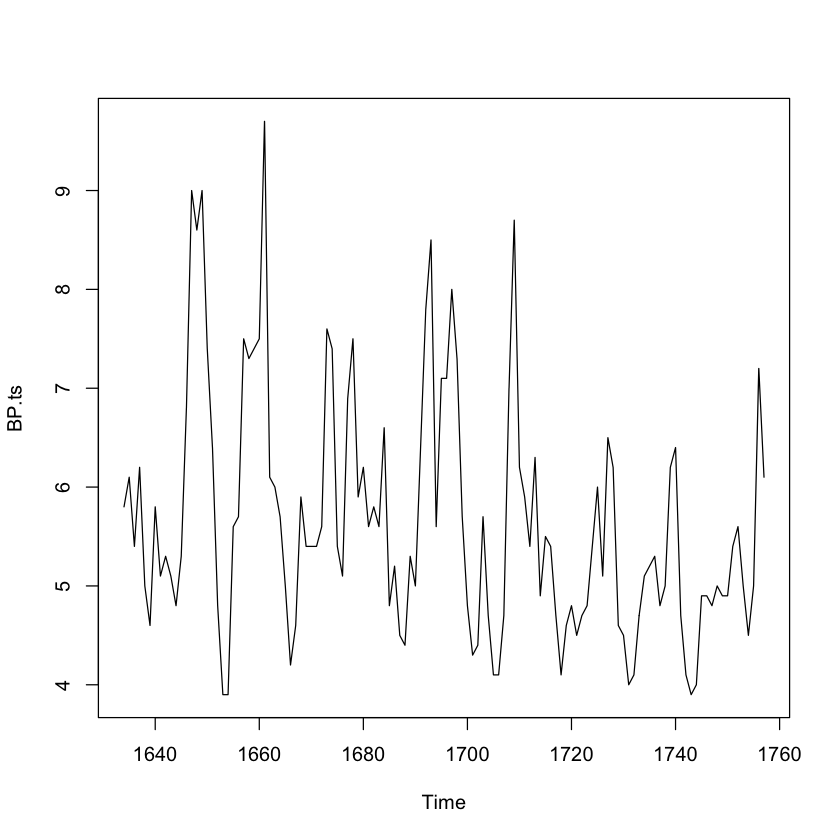

In [2]:
plot(BP.ts)

## ACF

> Geometrically decreasing function, with negative ACF values. Suggests a AR process with a AR parameter that's negative.

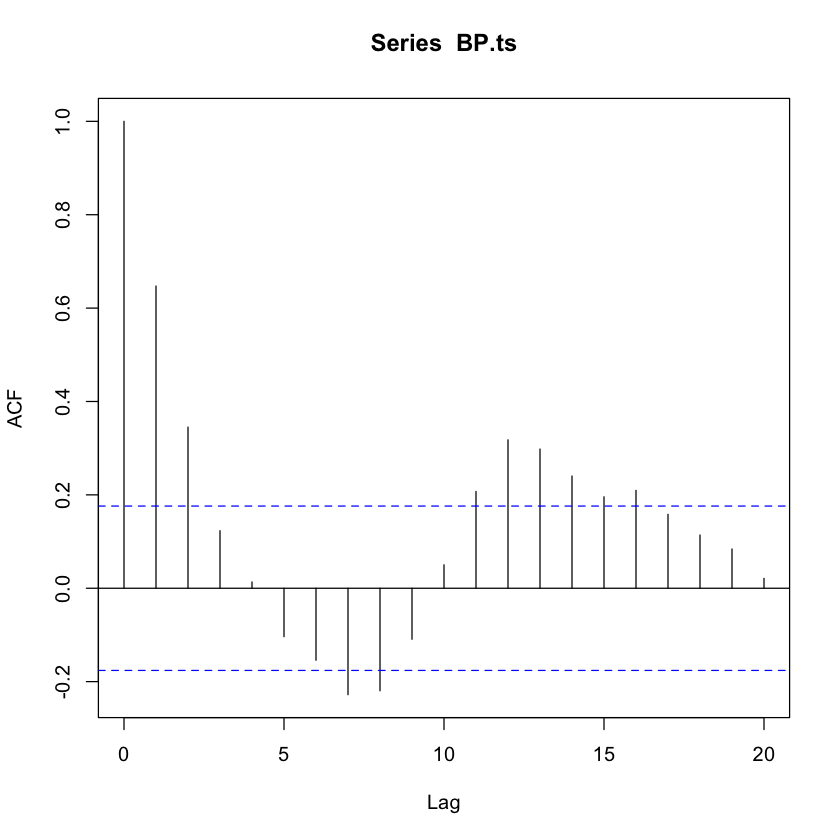

In [3]:
acf(BP.ts)

## PACF

> Nothing significant above the white noise 95% probability limits at ~0.18, this indicating that ideal p of AR(p) process is likely to be 1.

> Let's fit both AR(1) and AR(2) and compare the AIC statistics, as well as the significance of the additional parameter.

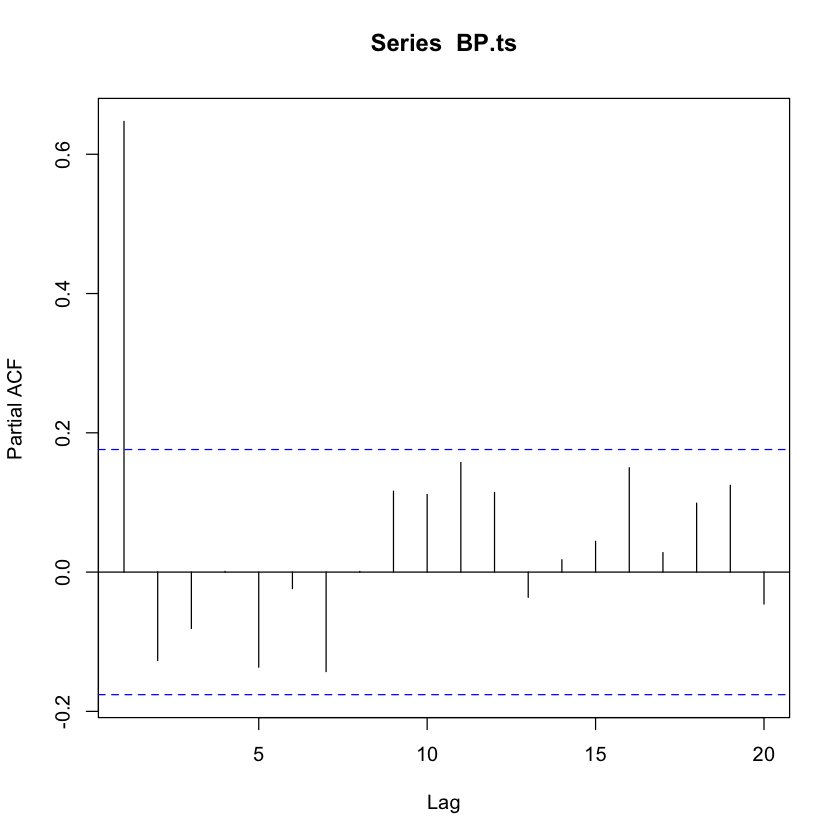

In [4]:
pacf(BP.ts)

## **AR(1)**

In [5]:
BP.ar.1 <- arima(BP.ts, order = c(1,0,0))

BP.ar.1


Call:
arima(x = BP.ts, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6429     5.6608
s.e.  0.0678     0.2307

sigma^2 estimated as 0.8655:  log likelihood = -167.26,  aic = 340.52

### t-statistic of parameter

In [6]:
ar.1.t <- 0.6429 / 0.0678
ar.1.t

[1] 9.482301

### degrees of freedom

In [7]:
ar.1.df <- length(BP.ts) - 3

## p-value associated with t-statistic

> highly significant at the 1% significance level

In [8]:
# lower.tail = FALSE so that P(T > t) since our observed t is positive
# and due to the symmetry of the t-distribution, we do a two tailed test as we're
# interested in equal or more extremeness at either end
2*pt(q = ar.1.t, ar.1.df, lower.tail = FALSE)

[1] 2.756086e-16

### and finally taking a quick look at the diagnostic plots

> standardised residuals - the residuals divided by the estimated sigma^2 - the estimated variance of the underlying white noise terms

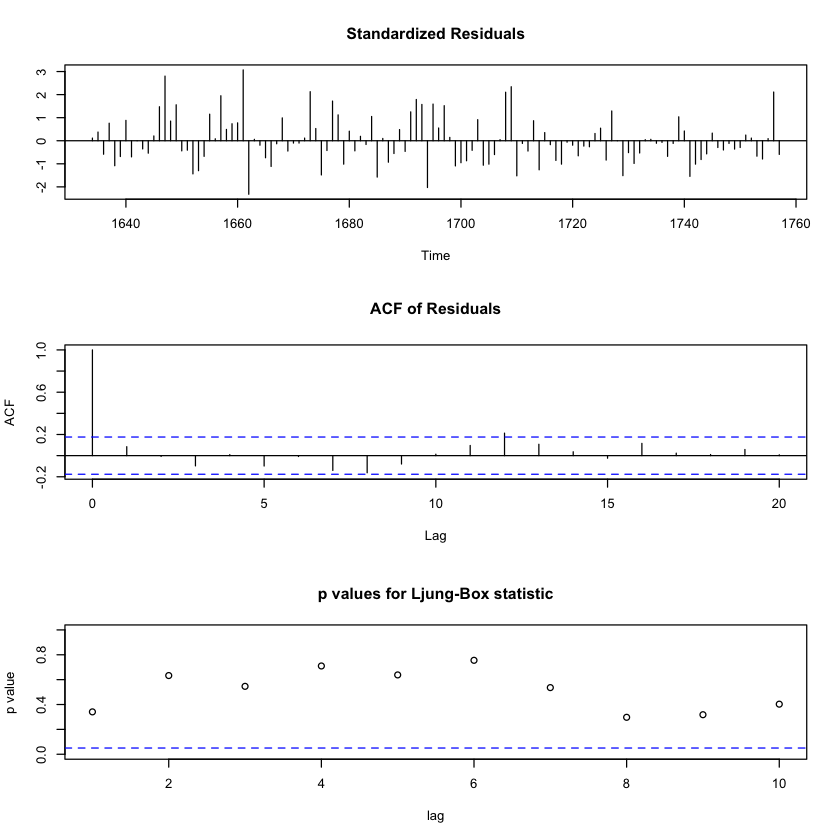

In [9]:
tsdiag(BP.ar.1)

## **AR(2)**

> taking a look at AR(2) and checking whether the additional parameter is significant, and whether the AIC statistic is lower than AR(1).

In [10]:
BP.ar.2 <- arima(BP.ts, order = c(2,0,0))

BP.ar.2


Call:
arima(x = BP.ts, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.7231  -0.1235     5.6546
s.e.  0.0888   0.0892     0.2051

sigma^2 estimated as 0.8521:  log likelihood = -166.31,  aic = 340.62

### t-statistic of additional parameter

In [11]:
ar.2.t <- -0.1235 / 0.0892

ar.2.t

[1] -1.384529

### degrees of freedom of AR(2)

In [12]:
ar.2.df <- length(BP.ts) - 4

### p-value associated with t-statistic for the second parameter of AR(2) model

> not significant at the 10% level

In [13]:
2*pt(ar.2.t, ar.2.df, lower.tail = TRUE)

[1] 0.1687656

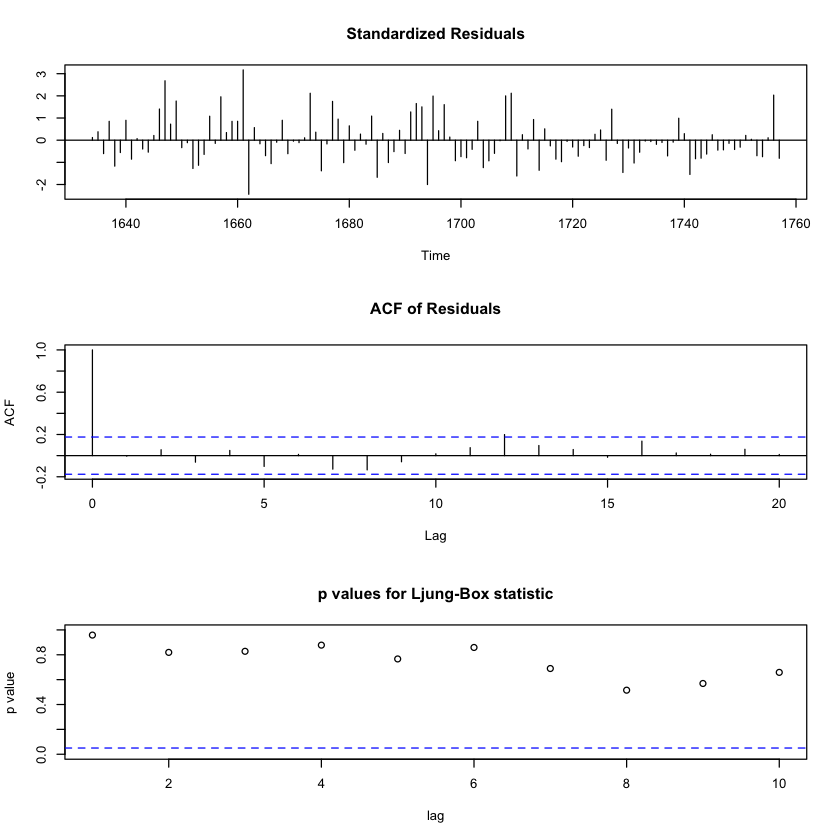

In [14]:
tsdiag(BP.ar.2)

### so we accept the AR(1) model for modelling bread prices

---

# **9.3** Forecasting bread prices

## $\text{AR}(1)$

> let's quickly get the 95% probability limit t-statistic from a t-distribution with 121 degrees of freedom

In [15]:
t <- qt(0.025, 121, lower.tail = FALSE)
t

[1] 1.979764

In [16]:
h <- 10
years <- 1958:(1958+h-1)

In [17]:
BP.fore <- predict(BP.ar.1, 10)

BP.fore$pred

A Time Series:
 [1] 5.943184 5.842361 5.777539 5.735862 5.709067 5.691839 5.680762 5.673641
 [9] 5.669062 5.666119

In [18]:
BP.fore$se

A Time Series:
 [1] 0.9303292 1.1060230 1.1709735 1.1967927 1.2073042 1.2116227 1.2134034
 [8] 1.2141386 1.2144425 1.2145680

In [19]:
L95 <- BP.fore$pred - t*BP.fore$se
U95 <- BP.fore$pred + t*BP.fore$se

In [20]:
BP.PL95 <- data.frame(years, L95, BP.fore$pred, U95)

BP.PL95

years,L95,BP.fore.pred,U95
<int>,<ts>,<ts>,<ts>
1958,4.101352,5.943184,7.785016
1959,3.652697,5.842361,8.032026
1960,3.459288,5.777539,8.095790
1961,3.366495,5.735862,8.105229
1962,3.318889,5.709067,8.099244
1963,3.293112,5.691839,8.090565
1964,3.278510,5.680762,8.083014
1965,3.269933,5.673641,8.077349
1966,3.264753,5.669062,8.073371


## Taking another look at the AR(1) summary

> Note the intercept is the **estimate of the mean**, $\hat{\mu}$.

> $\hat{\mu} = 5.6608$

> $\hat{\phi} = 0.6429$

> $\hat{\sigma}^{2} = 0.8655$

In [21]:
BP.ar.1


Call:
arima(x = BP.ts, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6429     5.6608
s.e.  0.0678     0.2307

sigma^2 estimated as 0.8655:  log likelihood = -167.26,  aic = 340.52

### Last value of the time series in year 1757:

In [22]:
BP.ts[length(BP.ts)]

[1] 6.1

### Let's feed these numbers into the forecast equation we've produced in the notes:

> $\hat{y}(h) = \mu + \phi^{h}(y_{T} - \mu)$

In [23]:
mu.hat <- 5.6608

phi.hat <- 0.6429

sigma.2.hat <- 0.8655

y.t <- BP.ts[length(BP.ts)]

y.hat.1 <- mu.hat + phi.hat * (y.t - mu.hat)
y.hat.1

[1] 5.943162

In [24]:
# check that against the AR(1) R model forecast
BP.fore$pred[1]

[1] 5.943184

### And $V(1) = \text{Var}(e_{T}(h)) = \sigma^{2}$

Therefore our estimate of $V(1) = \hat{\sigma}^{2} = 0.8655$

And we'd expect the 95% confidence limit to be ~ $t_{0.025} \times \hat{\sigma}$

In [25]:
y.hat.1 + c(-t*sqrt(sigma.2.hat),+t*sqrt(sigma.2.hat))

[1] 4.101343 7.784981

### Comparing with R output

In [26]:
BP.fore$pred[1] + c(-t*BP.fore$se[1],t*BP.fore$se[1])

[1] 4.101352 7.785016

---